# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information and json
def weather_check(city):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    results = requests.get(url)
    weather_json = results.json()
    try:
        id = weather_json['id']
        temp = weather_json['main']['temp']
        lat = weather_json['coord']['lat']
        lon = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        clouds = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        print(f"Processing {city} with city number {id}")
        return id, temp
    except:
        pass

for city in cities:
    try:
        wc = weather_check(city)
        
        id = wc[0]
        temp = wc[1]
        #print(wc)
    except:
        print(f"City, {city}, not found. Skipping...")

Processing poum with city number 2138555
Processing port lincoln with city number 2063036
Processing pisco with city number 3932145
Processing hambantota with city number 1244926
Processing east london with city number 1006984
Processing yellowknife with city number 6185377
Processing longyearbyen with city number 2729907
Processing mataura with city number 6201424
Processing hermanus with city number 3366880
City, attawapiskat, not found. Skipping...
Processing vao with city number 2137773
Processing ribeira grande with city number 3372707
Processing victoria with city number 1819729
Processing ewo with city number 2260009
Processing pedasi with city number 3703239
Processing ust-nera with city number 2120048
Processing novobirilyussy with city number 1508260
Processing butaritari with city number 2110227
Processing rikitea with city number 4030556
Processing bluff with city number 2206939
Processing ushuaia with city number 3833367
Processing olafsvik with city number 3414079
Process

Processing north platte with city number 5697939
Processing san juan with city number 3837213
City, bargal, not found. Skipping...
City, vaitupu, not found. Skipping...
Processing dingle with city number 1714733
Processing acapulco with city number 3533462
Processing codrington with city number 2171099
Processing pozhva with city number 505665
Processing tulun with city number 2014927
City, yanchukan, not found. Skipping...
Processing buchanan with city number 2278158
Processing saint-philippe with city number 935215
Processing mingoyo with city number 877925
Processing ripky with city number 695653
Processing ahipara with city number 2194098
Processing meulaboh with city number 1214488
Processing warin chamrap with city number 1605069
Processing progreso with city number 3521108
Processing faanui with city number 4034551
Processing nikolskoye with city number 546105
Processing brae with city number 2654970
Processing ust-tsilma with city number 477940
Processing araouane with city num

Processing manggar with city number 1636426
Processing quatre cocos with city number 1106643
Processing minab with city number 123941
Processing clonakilty with city number 2965402
Processing vila franca do campo with city number 3372472
Processing ucluelet with city number 6171633
Processing srandakan with city number 1626493
Processing dulce nombre de culmi with city number 3612810
Processing voyinka with city number 689307
Processing egvekinot with city number 4031742
Processing riyadh with city number 108410
City, ambodifototra, not found. Skipping...
Processing mayo with city number 4362001
Processing longkou with city number 1802550
City, burica, not found. Skipping...
Processing cururupu with city number 3401148
Processing baykit with city number 1510689
Processing plock with city number 3088825
Processing sibu with city number 1735902
Processing belmonte with city number 3470137
Processing abu kamal with city number 174448
Processing sayat with city number 1218436
Processing sa

Processing slave lake with city number 6149374
Processing fuerte olimpo with city number 3438102
Processing beyneu with city number 610298
Processing hamilton with city number 4513583
Processing the valley with city number 3573374
Processing dunedin with city number 2191562
Processing schleiden with city number 2838744
Processing bafra with city number 751335
Processing chimbote with city number 3698304
Processing mantua with city number 3174050
Processing saskatoon with city number 6141256
Processing vicksburg with city number 4449620
Processing xining with city number 1788852
Processing opuwo with city number 3354077
Processing gazanjyk with city number 161974
Processing maues with city number 3395062
Processing riihimaki with city number 639406
Processing okhotsk with city number 2122605
Processing yangshan with city number 1925381
Processing kaduy with city number 554535
Processing port-gentil with city number 2396518
Processing loukhi with city number 533964
Processing college wit

In [7]:
# Lists to hold data
city_list = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

#Loop through weather data
def weather_check(city):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    results = requests.get(url)
    weather_json = results.json()
    try:
        city_list.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        
        return lon
    except:
        pass

for city in cities:
    try:
        wc = weather_check(city)

    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a data frame
weather_dict = {
    'City': city_list,
    'Lat': lat,
    'Lon': lon,
    'Max_Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind_Speed': wind, 
    'Country': country,
    'Date': date
    
}
city_weather_data_df = pd.DataFrame(weather_dict)
city_weather_data_df


,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Poum,-20.23,164.02,70.50,74,89,18.12,NC,1595450618
1,Port Lincoln,-34.73,135.87,48.70,83,1,9.22,AU,1595450530
2,Pisco,-13.70,-76.22,68.00,72,0,6.93,PE,1595450618
3,Hambantota,6.12,81.12,79.74,84,94,10.20,LK,1595450138
4,East London,-33.02,27.91,63.61,52,0,6.26,ZA,1595450324
...,...,...,...,...,...,...,...,...,...
572,San Martín,-33.08,-68.47,46.40,70,75,6.93,AR,1595450702
573,Bashtanka,47.41,32.44,64.11,61,76,5.41,UA,1595450702
574,Verkhoyansk,67.54,133.38,72.82,45,33,7.94,RU,1595450703
575,Nyurba,63.28,118.33,57.02,89,77,6.20,RU,1595450703


In [9]:
#Output to CSV
city_weather_data_df.to_csv('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/cities.csv')
    

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
find_humidity_outliers = city_weather_data_df[city_weather_data_df['Humidity'] > 100 ].index
#find_humidity_outliers

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data_df = city_weather_data_df.drop(find_humidity_outliers , inplace=False)
cleaned_city_data_df

,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Poum,-20.23,164.02,70.50,74,89,18.12,NC,1595450618
1,Port Lincoln,-34.73,135.87,48.70,83,1,9.22,AU,1595450530
2,Pisco,-13.70,-76.22,68.00,72,0,6.93,PE,1595450618
3,Hambantota,6.12,81.12,79.74,84,94,10.20,LK,1595450138
4,East London,-33.02,27.91,63.61,52,0,6.26,ZA,1595450324
...,...,...,...,...,...,...,...,...,...
572,San Martín,-33.08,-68.47,46.40,70,75,6.93,AR,1595450702
573,Bashtanka,47.41,32.44,64.11,61,76,5.41,UA,1595450702
574,Verkhoyansk,67.54,133.38,72.82,45,33,7.94,RU,1595450703
575,Nyurba,63.28,118.33,57.02,89,77,6.20,RU,1595450703


In [12]:
# Extract relevant fields from the data frame
cols = [0,1,3,4,5,6]
relevant_city_data_df = cleaned_city_data_df[cleaned_city_data_df.columns[cols]]
relevant_city_data_df 

# Export the City_Data into a csv
relevantcity_output_data_file = "output_data/cities.csv"

relevant_city_data_df 

,City,Lat,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Poum,-20.23,70.50,74,89,18.12
1,Port Lincoln,-34.73,48.70,83,1,9.22
2,Pisco,-13.70,68.00,72,0,6.93
3,Hambantota,6.12,79.74,84,94,10.20
4,East London,-33.02,63.61,52,0,6.26
...,...,...,...,...,...,...
572,San Martín,-33.08,46.40,70,75,6.93
573,Bashtanka,47.41,64.11,61,76,5.41
574,Verkhoyansk,67.54,72.82,45,33,7.94
575,Nyurba,63.28,57.02,89,77,6.20


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

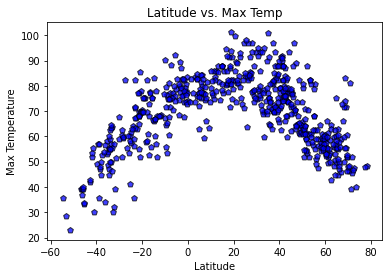

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Max_Temp"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/max_temp.png')
plt.show()


## Latitude vs. Humidity Plot

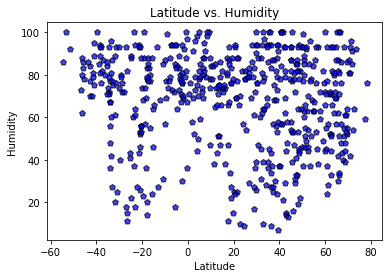

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Humidity"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

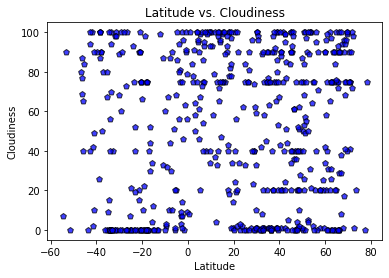

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/clouds.png')
plt.show()

## Latitude vs. Wind Speed Plot

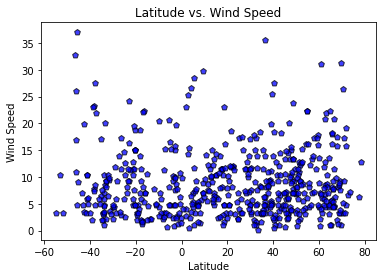

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Wind_Speed"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/wind.png')
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
hemisphere = []
x_values = []
def linearregression: 
    x_axis = hemisphere = []
    y_axis = x_values = []

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(10,43),fontsize=18,color="red")

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)


SyntaxError: invalid syntax (<ipython-input-20-f941a76cc5e6>, line 4)

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = relevant_city_data_df.loc[relevant_city_data_df['Lat'] >= 0] 
southern_hemisphere_df = relevant_city_data_df.loc[relevant_city_data_df['Lat'] <= 0] 


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

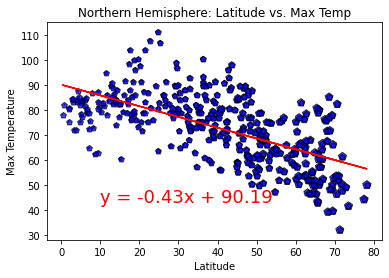

In [22]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,43),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


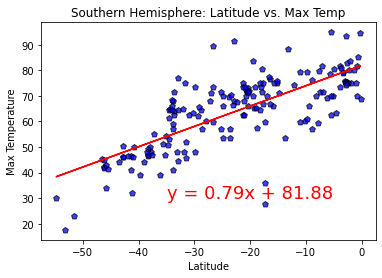

In [24]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

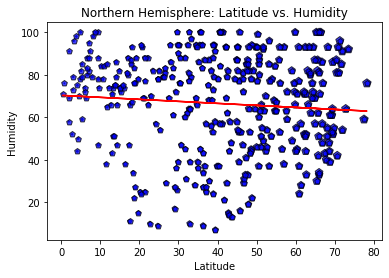

In [25]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,2),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


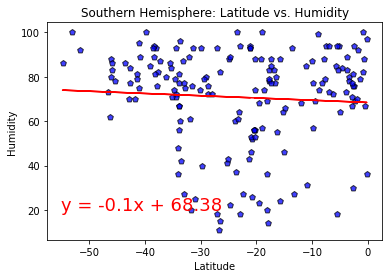

In [26]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

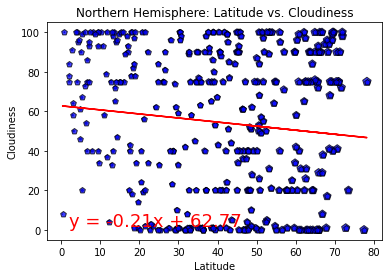

In [27]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,2),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


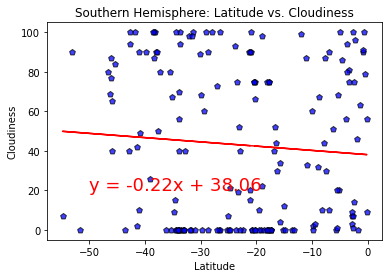

In [28]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

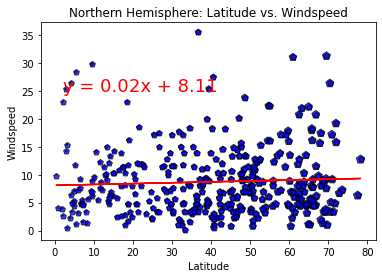

In [29]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,25),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Northern Hemisphere: Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


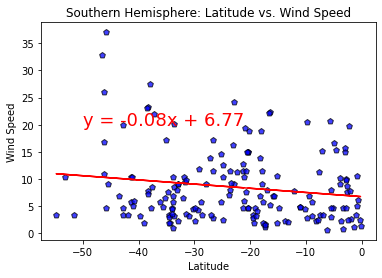

In [30]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()